In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/car_price.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [4]:
numeric_columns = df.select_dtypes("number").columns
numeric_columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
df = df[numeric_columns]
df.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
X = df.drop(columns=["car_ID", "price", "symboling"]).values
y = df["price"].values

train_ratio = 0.8
split_idx = int(len(X) * train_ratio)

X_train = X[:split_idx]
y_train = y[:split_idx]

X_test = X[split_idx:]
y_test = y[split_idx:]

X_train.shape, X_test.shape

((164, 13), (41, 13))

In [7]:
from sklearn.preprocessing import StandardScaler

sclr = StandardScaler()
X_train = sclr.fit_transform(X_train)
X_test = sclr.transform(X_test)
X_train

array([[-1.54070935, -0.31489459, -0.74188052, ..., -0.28640508,
        -0.62852937, -0.54741266],
       [-1.54070935, -0.31489459, -0.74188052, ..., -0.28640508,
        -0.62852937, -0.54741266],
       [-0.59200732, -0.12873882, -0.12739362, ..., -0.28640508,
        -0.92012433, -0.68725016],
       ...,
       [-0.39905098, -0.50880685, -0.61020476, ..., -0.71931229,
         0.39205297,  0.43144985],
       [-0.39905098, -0.50880685, -0.61020476, ..., -0.71931229,
         0.39205297,  0.43144985],
       [-0.59200732, -0.32265108, -0.78577244, ..., -0.71931229,
         0.53785045,  0.43144985]], shape=(164, 13))

In [8]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()
sgd.fit(X_train, y_train)

SGDRegressor()

In [9]:
sgd.score(X_test, y_test)

0.4227533647105334

In [10]:
from sklearn.metrics import root_mean_squared_error, r2_score

class MiniBatchGradientDescent:
    def __init__(self, lr, max_iter, tol):
        self.lr = lr
        self.max_iter = max_iter
        self.tol = tol
        
        self.coef_ = None
        self.intercept_ = None

        self.lossi = []

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        n = X.shape[0]

        X = np.c_[np.ones(n), X]

        n_features = X.shape[1]

        coef = np.random.randn(n_features)

        converged = False

        batch_size = 8

        for epoch in range(self.max_iter):
            for i in range((n + batch_size - 1) // batch_size):
                x = X[i * batch_size : min(n, (i + 1) * batch_size)]
                yy = y[i * batch_size : min(n, (i + 1) * batch_size)]
                y_pred = x @ coef
                e = yy - y_pred

                loss = root_mean_squared_error(yy, y_pred)
                self.lossi.append(loss)

                coef_grad = (-2) * x.T @ e

                if np.linalg.norm(self.lr * coef_grad) < self.tol:
                    converged = True
                    break

                coef = coef - self.lr * coef_grad

            
        if not converged:
            print(f"Warning: Did not converge after {self.max_iter} steps.")
        
        self.coef_ = coef[1:]
        self.intercept_ = coef[0]
        self.step = epoch

        return self
    
    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return X @ np.r_[self.intercept_, self.coef_]

    def score(self, X, y):
        return r2_score(y, self.predict(X))

In [11]:
mbgd = MiniBatchGradientDescent(lr=0.01, max_iter=10, tol=0.001)
mbgd.fit(X_train, y_train)

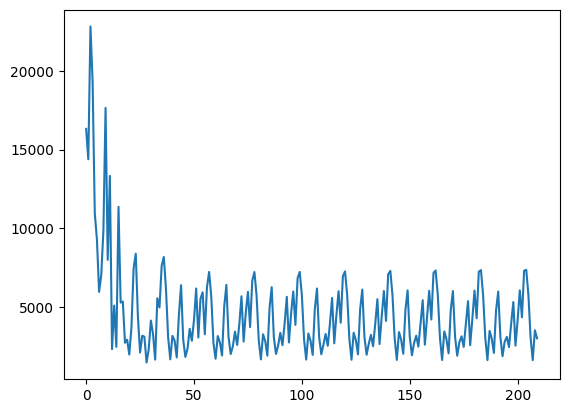

In [12]:
plt.plot(mbgd.lossi)
plt.show()

In [13]:
mbgd.score(X_test, y_test)

0.4476716616239653

In [14]:
mbgd.score(X_train, y_train)

0.8077139536493371